# Part 1: Analysis of the data 

## Working with Crime Data 

**Lynell Amanna**

The source of this data is Berkeley Crime Data 
The data set used in this workbook is Crime data 

In [1]:
import pandas as pd
import numpy as np 
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io
import math
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline  

In [2]:
df = pd.read_csv('Berkeley.csv')

In [3]:
X = df[['Latitude', 'Longitude']]
df['count'] = 1 
df


,CASENO,OFFENSE_CAT,VIOLENT_FLG,OFFENSE,EVENT_MONTH,EVENT_DAY,EVENT_YEAR,EVENT_TIME,CVLEGEND,EVENT_DOW,Day,BLKADDR,City,State,Latitude,Longitude,count
0,16042280,VEHICLE THEFT,0,VEHICLE STOLEN,7,17,2016,16,MOTOR VEHICLE THEFT,0,Sunday,300 PANORAMIC WAY,Berkeley,CA,37.869926,-122.246398,1
1,16048878,VEHICLE THEFT,0,VEHICLE STOLEN,8,18,2016,16,MOTOR VEHICLE THEFT,4,Thursday,1900 BONITA AVE,Berkeley,CA,37.873454,-122.272090,1
2,16050316,THEFT,0,THEFT MISD. (UNDER $950),8,26,2016,11,LARCENY,5,Friday,1900 SHATTUCK AVE,Berkeley,CA,37.873687,-122.268616,1
3,16046007,THEFT,0,THEFT MISD. (UNDER $950),7,6,2016,0,LARCENY,3,Wednesday,3000 STANTON ST,Berkeley,CA,37.853203,-122.279642,1
4,16037695,VANDALISM,0,VANDALISM,6,25,2016,22,VANDALISM,6,Saturday,CALIFORNIA STREET & BANCROFT WAY,Berkeley,CA,37.866112,-122.279303,1
5,16091093,VANDALISM,0,VANDALISM,7,3,2016,18,VANDALISM,0,Sunday,2400 TELEGRAPH AVE,Berkeley,CA,37.866761,-122.258779,1
6,16052323,VEHICLE THEFT,0,VEHICLE STOLEN,9,4,2016,13,MOTOR VEHICLE THEFT,0,Sunday,1000 CRAGMONT AVE,Berkeley,CA,37.891102,-122.265854,1
7,16048316,MISSING PERSON,0,MISSING ADULT,8,16,2016,17,MISSING PERSON,2,Tuesday,1400 SIXTY-SEVENTH ST,Berkeley,CA,37.877830,-122.299723,1
8,16035891,NARCOTICS,0,NARCOTICS,6,17,2016,19,DRUG VIOLATION,5,Friday,1300 HASKELL ST,Berkeley,CA,37.851107,-122.283240,1
9,16035140,BURGLARY,0,BURGLARY AUTO,6,14,2016,9,BURGLARY - VEHICLE,2,Tuesday,2400 DURANT AVE,Berkeley,CA,37.867513,-122.261270,1


### Clustering with K-Means

In [49]:
n = 3
## initialize with K-means++, a good way of speeding up convergence
k_means = KMeans(init='k-means++', n_clusters=n, n_init=10)
# start clustering!
k_means.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

### K- Means Results

In [50]:
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)
ft = (k_means_labels, k_means_cluster_centers, k_means_labels_unique)
print ("labels:\n %s, \n cluster centers:\n %s,\n  unique labels:\n %s" % ft)

labels:
 [2 0 0 ..., 0 1 1], 
 cluster centers:
 [[  37.87705872 -122.27071405]
 [  37.86846697 -122.29532419]
 [  37.86076678 -122.26421963]],
  unique labels:
 [0 1 2]


### Plotting on Google Maps

In [27]:
import gmplot

In [28]:

gmap = gmplot.GoogleMapPlotter(37.869363, -122.268028, 13)
#gmap.plot(X['Latitude'], X['Longitue'], 'cornflowerblue', edge_width=10)
gmap.scatter(X['Latitude'], X['Longitude'], '#3B0B39', size=30, marker=False)
# gmap.scatter(marker_lats, marker_lngs, 'k', marker=True)
#gmap.heatmap(X['Latitude'], X['Longitue'])

gmap.draw("mymap.html")

### Visualizing K-Means

//anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


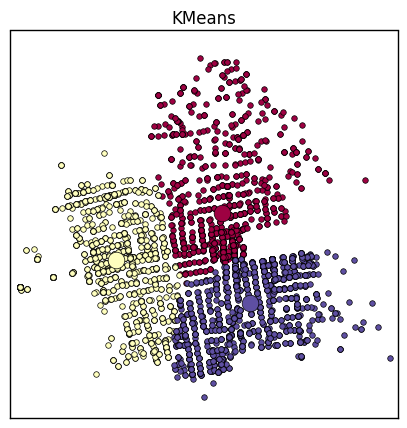

In [51]:
fig = plt.figure(figsize=(5, 5))
colors = plt.cm.Spectral(np.linspace(0, 1, n))

ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(n), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X['Longitude'][my_members], X['Latitude'][my_members], 'w',
            markerfacecolor=col, marker='o', markersize=4)
    ax.plot(cluster_center[1], cluster_center[0], 'o',
            markerfacecolor=col, markeredgecolor='k', markersize=12)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import altair 
import numpy as np 

In [30]:
d_ = df.groupby(['Day']).count()['count']
d = pd.DataFrame(d_, columns = ['count'])
d

,count
Day,
Friday,698
Monday,647
Saturday,606
Sunday,585
Thursday,670
Tuesday,620
Wednesday,659


array([<matplotlib.axes._subplots.AxesSubplot object at 0x119575198>], dtype=object)

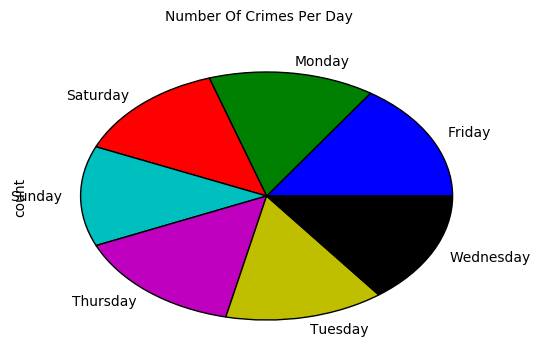

In [31]:
d.plot(x='Day', y= 'count' ,kind="pie",subplots =True, title = 'Number Of Crimes Per Day',legend=False)

The above graph is a Pie Chart that depicts the number of crimes that took place in the Berkeley region on each day of the week. We try to understand from the given data set if the number of crimes varies by a given day of the week. From the above chart we see that the distribution of the number of crimes by day is almost even. The number of crimes does not vary by weekend or weekday either. 

Such a visualization can be important to improve our understanding of when and on what days if any, does security need to be ramped up. 

As seen from the data the weekends see higher numbers of crimes but these differences are minor and may not be significant enough to take action as seen from the pie chart above. 

In [4]:
e_ = df.groupby(['OFFENSE_CAT']).count()['count']
e = pd.DataFrame(e_, columns = ['count'])
e.head(10)

,count
OFFENSE_CAT,
2ND RESPONSE,22
ALCOHOL OFFENSE,146
ARSON,13
ASSAULT/BATTERY,286
BRANDISHING,19
BURGLARY,968
DISTURBANCE,368
DOMESTIC VIOLENCE,116
FRAUD/FORGERY,112


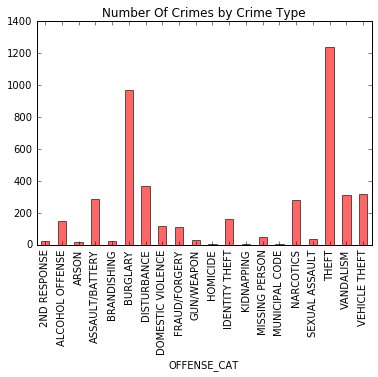

In [9]:
e.plot(kind="bar",title="Number Of Crimes by Crime Type",color='red',alpha=0.6,legend=False)
plt.savefig('crime type.png')


The above graph shows the Number of crimes by the type of the crime taking place. Such a visualization is important to know the severity of crimes and accordingly plan for suitable measures that can be taken to overcome such cases.

The above graph shows that the Theft and Burglary type peaks at somewhere around 1200 and 100, while the rest are significantly lower in number.

In [34]:
filt = df
list_1 = []
for each in range(len(filt)):
    
    if filt['EVENT_TIME'][each]>=22 or filt['EVENT_TIME'][each]<=5:
        list_1.append('10pm to 5am')
    elif filt['EVENT_TIME'][each]>=6 and filt['EVENT_TIME'][each]<=12:
        list_1.append('6am to 12pm')
    elif filt['EVENT_TIME'][each]>=13 and filt['EVENT_TIME'][each]<=17:
        list_1.append('1pm to 5pm')
    else:
        list_1.append('6pm to 9pm')
    
list_1 = pd.Series(list_1)
filt['time_categories'] = list_1

In [35]:
e_ = filt.groupby(['time_categories']).count()['count']
e = pd.DataFrame(e_, columns = ['count'])
e

,count
time_categories,
10pm to 5am,1218
1pm to 5pm,1094
6am to 12pm,1220
6pm to 9pm,953


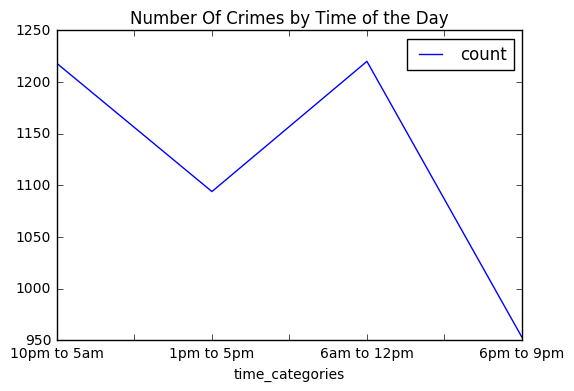

In [36]:

e.plot(kind="line",title="Number Of Crimes by Time of the Day",legend=True)




The above graph shows the number of crimes by the Time of the day categories. For this viz. the data was first partitioned into 4 separate categories, they are 1pm to 5pm(Afternoon to early evening), 6am to 12pm(early morning to noon) , 6pm to 9pm(Evening to night) and 10pm to 6am(Late night to early morning).

The graph above shows that the number of crime incidents peak in the 10pm to 5am and the 6am to 12pm bucket.

However it is important to note that the severity of the crimes have not been taken into consideration for this visualization.